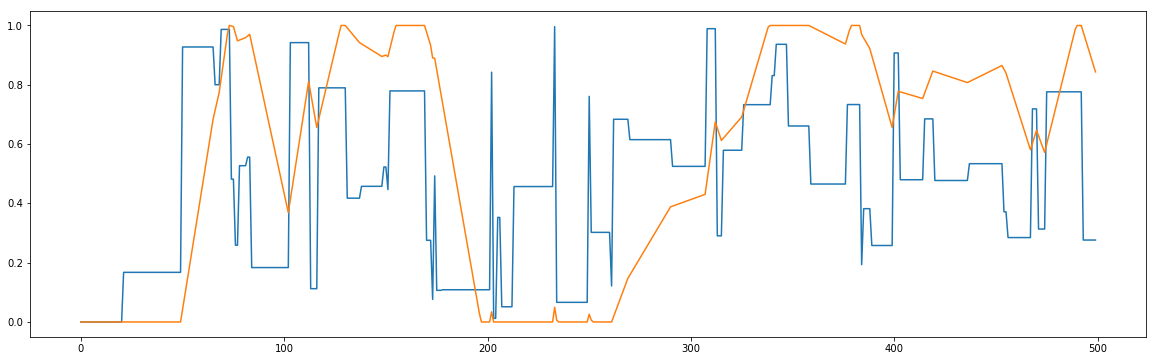

In [301]:
import numpy as np
from scipy.stats import truncnorm
import random
import math
import copy
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm

def generate_data(num_of_data):
    input_data=[]
    output_data=[]
    current_input_value=0
    current_output_value=0
    for i in range(num_of_data):
        if (random.random()<0.1):
            current_input_value=random.random()
#            current_output_value=0
        current_input_value=current_input_value+(random.random()-0.5)*0
        current_output_value=current_output_value+0.0*(current_input_value-current_output_value)+(current_input_value-0.5)*0.1
        if (current_output_value<0):
            current_output_value=0
        if (current_output_value>1):
            current_output_value=1
            
        input_data.append(current_input_value)
        output_data.append(current_output_value)
    return input_data,output_data

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20, 6)

input_data,output_data=generate_data(500)
plt.plot(input_data)
plt.plot(output_data)
plt.show()

In [388]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch import optim


class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.number_of_layers=1
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size, hidden_size,self.number_of_layers)
        self.Dense1 = nn.Linear(hidden_size, hidden_size)
        self.Dense1A = nn.ReLU()
        self.Dense2 = nn.Linear(hidden_size, output_size)
        

    def forward(self, input, hidden):
        gru_output, hidden = self.gru(input, hidden)
        Dense1Out=self.Dense1(gru_output)
        Dense1OutAct=self.Dense1A(Dense1Out)
        output=self.Dense2(Dense1OutAct)
        return output, hidden

    def initHidden(self):
        return Variable(torch.zeros(self.number_of_layers,1,self.hidden_size))
    

training...

0m 0s (0 0%) tl=0.0000
0m 4s (2000 0%) tl=0.3053
0m 8s (4000 1%) tl=0.2592
0m 12s (6000 2%) tl=0.1838
0m 16s (8000 3%) tl=0.1598
0m 21s (10000 4%) tl=0.1039
0m 25s (12000 4%) tl=0.1342
0m 29s (14000 5%) tl=0.0978
0m 33s (16000 6%) tl=0.1425
0m 37s (18000 7%) tl=0.1426
0m 41s (20000 8%) tl=0.1221
0m 46s (22000 8%) tl=0.0971
0m 50s (24000 9%) tl=0.1238
0m 54s (26000 10%) tl=0.1269
0m 58s (28000 11%) tl=0.1386
1m 3s (30000 12%) tl=0.1126
1m 7s (32000 12%) tl=0.1041
1m 11s (34000 13%) tl=0.1073
1m 15s (36000 14%) tl=0.0748
1m 19s (38000 15%) tl=0.0761
1m 24s (40000 16%) tl=0.1199
1m 28s (42000 16%) tl=0.1139
1m 32s (44000 17%) tl=0.0947
1m 36s (46000 18%) tl=0.0687
1m 40s (48000 19%) tl=0.0966
1m 45s (50000 20%) tl=0.0829
1m 49s (52000 20%) tl=0.0822
1m 53s (54000 21%) tl=0.0926
1m 57s (56000 22%) tl=0.0745
2m 1s (58000 23%) tl=0.0697
2m 6s (60000 24%) tl=0.0693
2m 10s (62000 24%) tl=0.0933
2m 14s (64000 25%) tl=0.0788
2m 18s (66000 26%) tl=0.0593
2m 22s (68000 27%) tl=0.0600


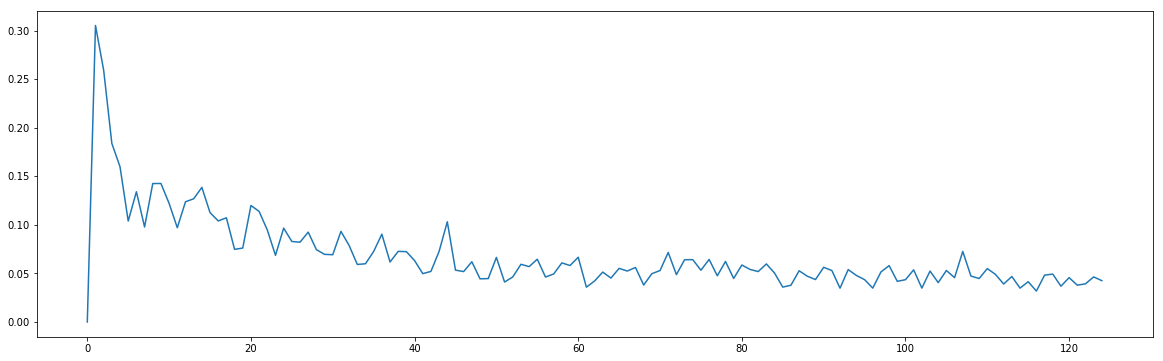

In [406]:
import time
import math
import operator

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)
rnn = RNN(1, 50, 1)

n_iters = 250000
print_every = 2000
plot_every = 2000
all_losses = []
total_loss_print = 0
total_loss_plot = 0

criterion=nn.L1Loss()
    
print("training...\n")

start = time.time()
optimizer = optim.Adam(rnn.parameters(), lr=0.0002)
rnn_hidden = rnn.initHidden()
rnn.zero_grad()
loss = 0
#for gata_q in range(int(n_iters/500)):
#    rnn_hidden = rnn.initHidden()

input_data,output_data=generate_data(n_iters)
for data_index in range(len(input_data)):
    input_tensor=torch.zeros(1, 1, 1)
    input_tensor[0][0][0]=input_data[data_index]

    output_tensor=torch.zeros(1, 1, 1)
    output_tensor[0][0][0]=output_data[data_index]

    rnn_output, rnn_hidden = rnn(Variable(input_tensor), rnn_hidden)
    loss += criterion(rnn_output, Variable(output_tensor))


    if data_index%2==0:
        loss.backward()

        total_loss_print += loss.data[0]
        total_loss_plot += loss.data[0]
        optimizer.step()
        rnn_hidden=Variable(rnn_hidden.data)
        rnn.zero_grad()
        loss = 0

    if data_index % print_every == 0:
        print('%s (%d %d%%) tl=%.4f' % (timeSince(start), data_index, data_index / n_iters * 100,total_loss_print/print_every))
        total_loss_print = 0

    if data_index % plot_every == 0:
        all_losses.append(total_loss_plot / plot_every)
        total_loss_plot = 0



import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)
plt.show()

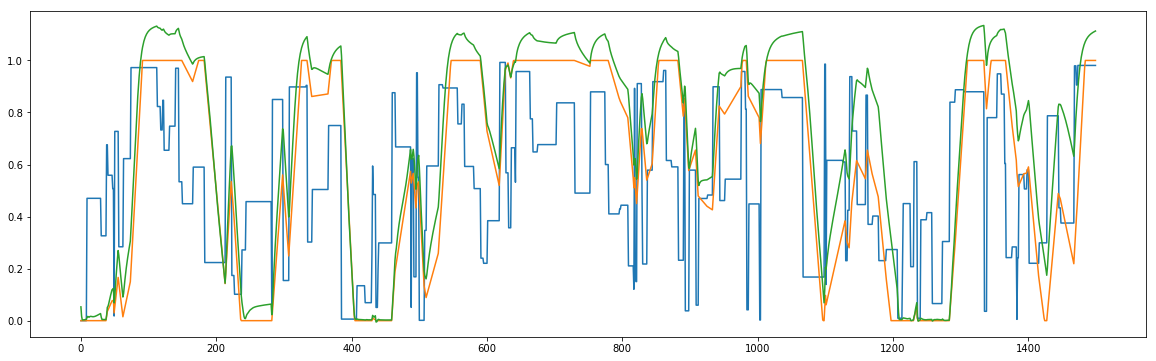

In [407]:
rnn_hidden = rnn.initHidden()

rnn.zero_grad()
loss = 0

rnn_output_data=[]
input_data,output_data=generate_data(1500)
for data_index in range(len(input_data)):
    input_tensor=torch.zeros(1, 1, 1)
    input_tensor[0][0][0]=input_data[data_index]
    rnn_output, rnn_hidden = rnn(Variable(input_tensor), rnn_hidden)
    rnn_output_data.append(rnn_output.data.numpy()[0][0][0])
    
plt.plot(input_data)#blue
plt.plot(output_data)#ogange
plt.plot(rnn_output_data)#green
plt.show()